In [4]:
# Config
import os

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monitoring
from tqdm.notebook import tqdm

# IO
from os.path import join, exists, basename, dirname, splitext, expanduser
from glob import glob

# Parallel processing
from joblib import Parallel, delayed
import geopandas as gpd

from astra.plot.utils import latexify

In [5]:
india_shape = gpd.read_file("/home/patel_zeel/kiln_compass_24/raw_shapefiles/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp").to_crs("EPSG:4326")

kiln_locations = []
for state in ["uttar_pradesh", "bihar", "west_bengal", "haryana", "punjab"]:
    kiln_locations.append(gpd.read_file(f"/home/patel_zeel/kiln_compass_24/final_data/labels/{state}.geojson").to_crs("EPSG:4326"))
    
all_kilns_gdf = pd.concat(kiln_locations, ignore_index=True)
len(all_kilns_gdf)

30638

In [6]:
india_shape.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12..."
1,Chandigarh,"POLYGON ((76.77232 30.7942, 76.77286 30.79343,..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.9639 20...."
3,Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989..."
4,Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152..."


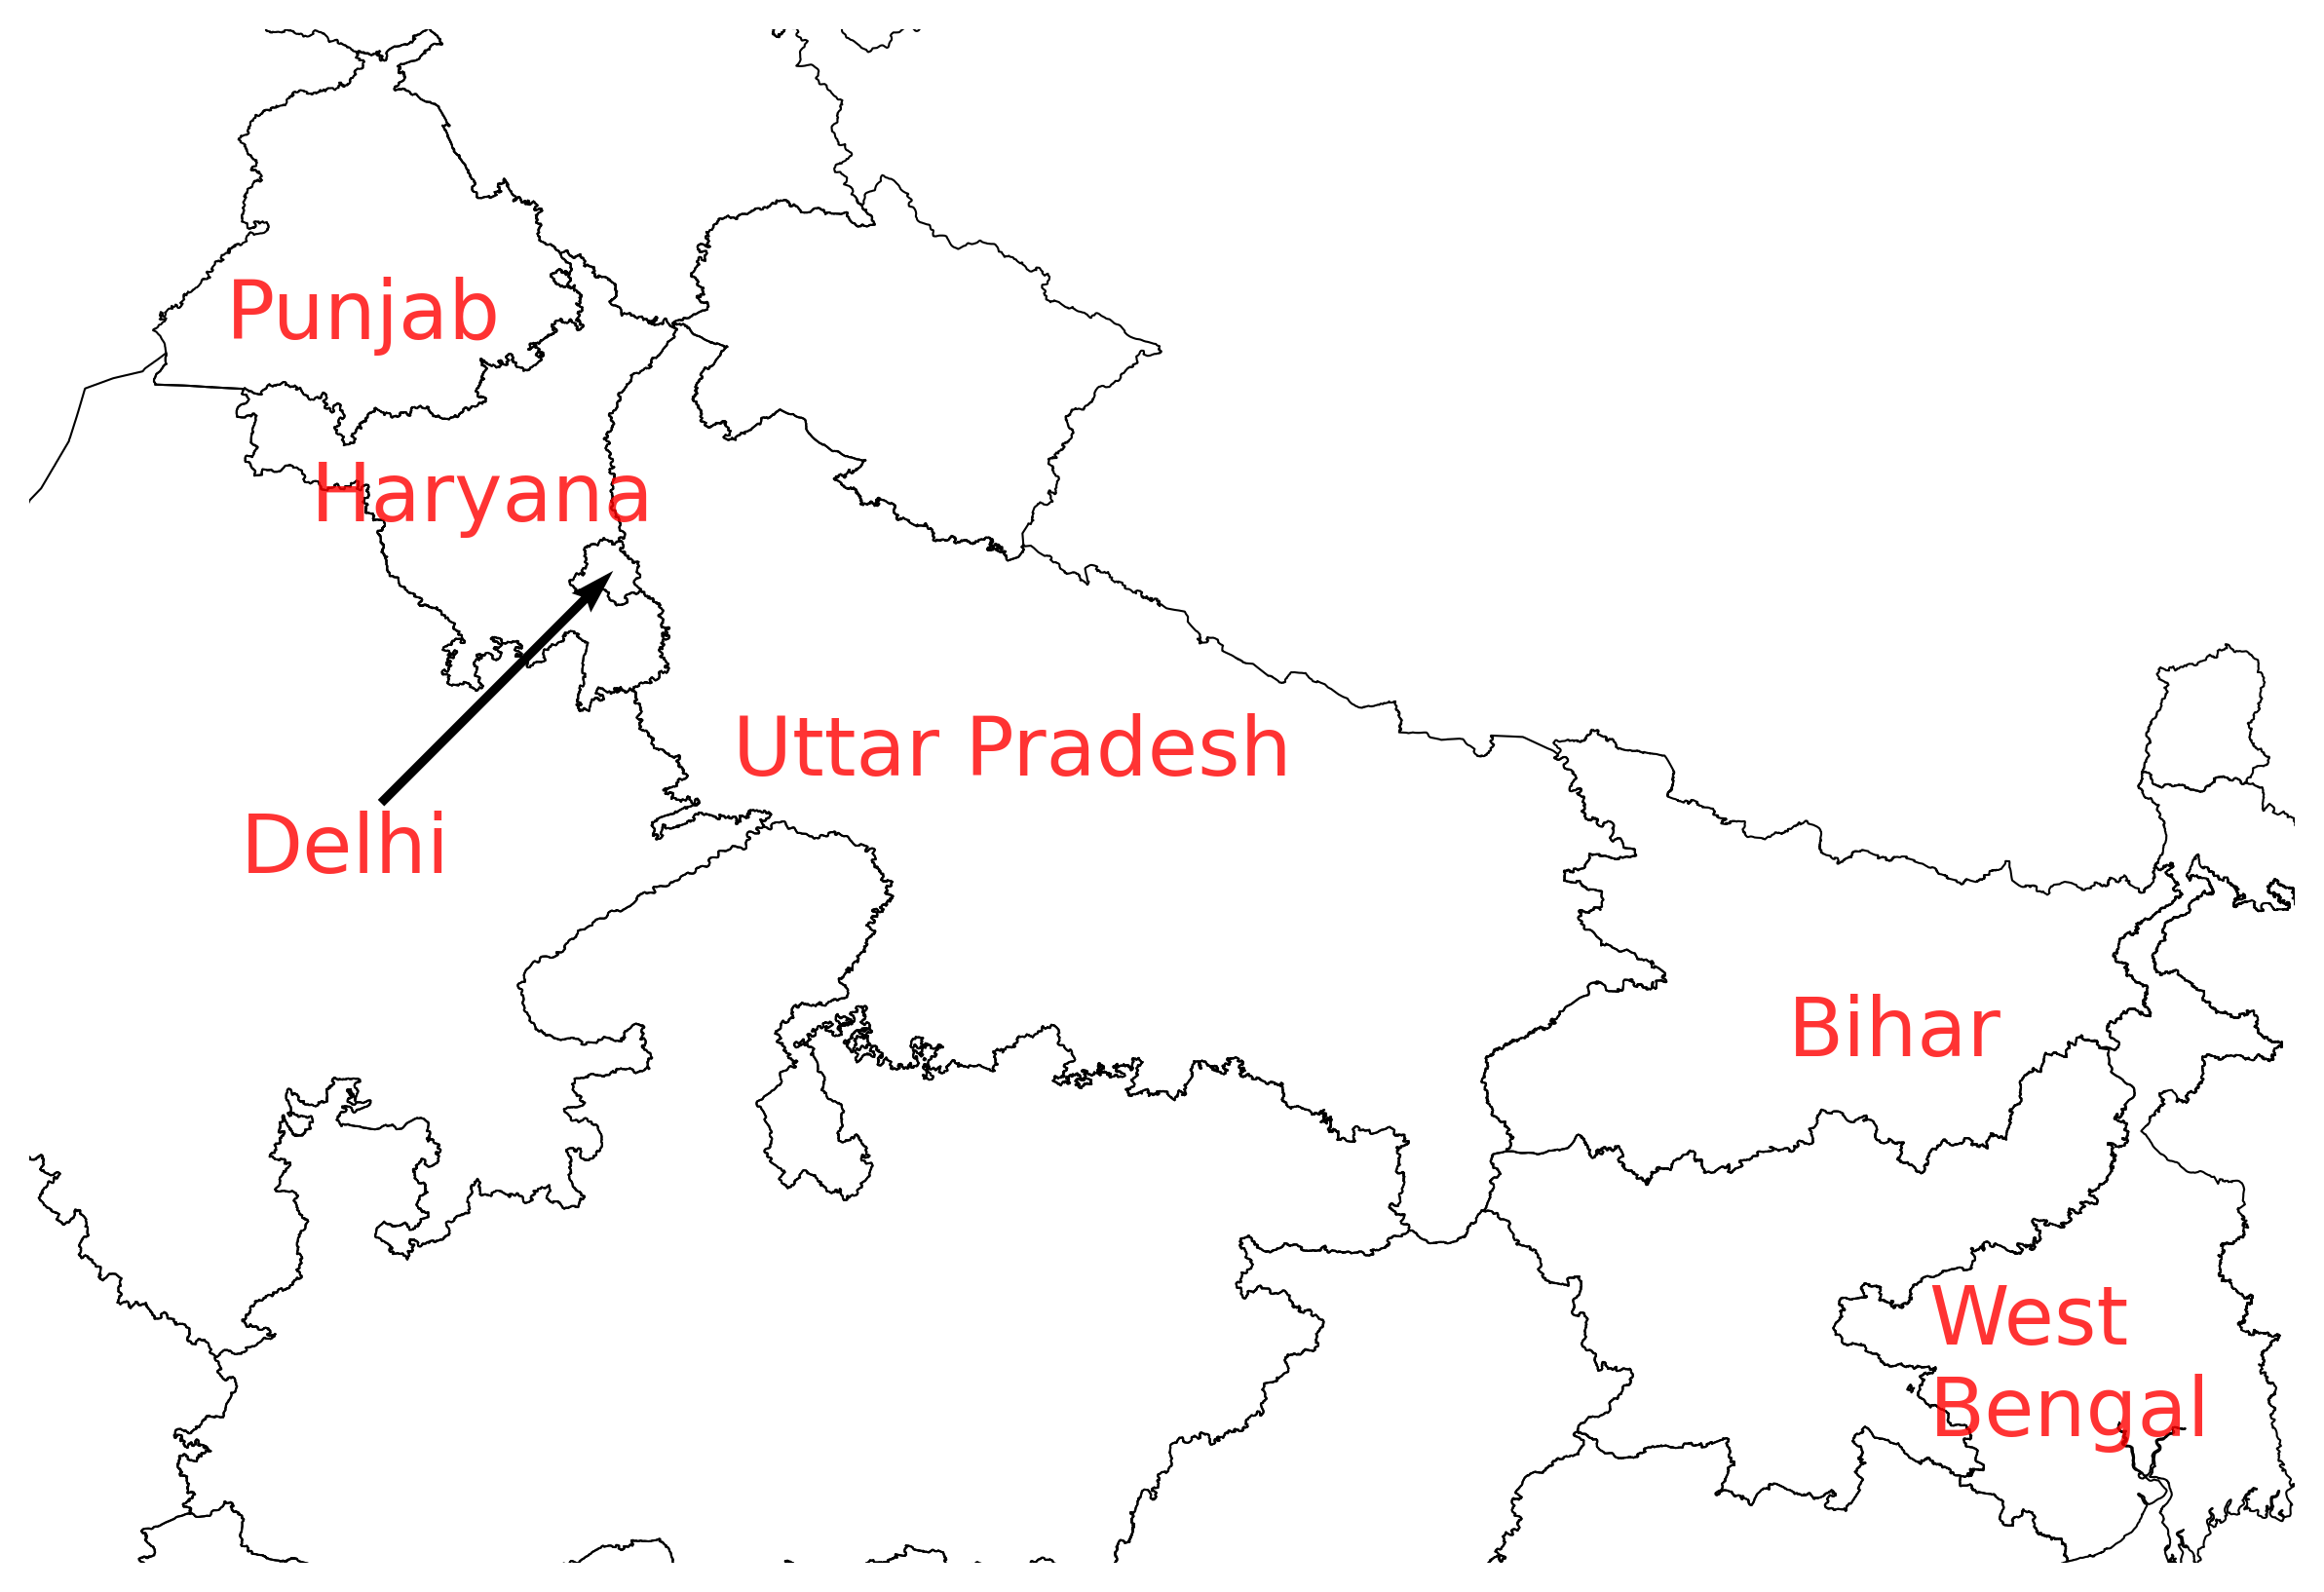

In [14]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
india_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)
ax.set_aspect("equal")
ax.set_axis_off()
ax.set_xlim(73, 89.1)
ax.set_ylim(21.6, 32.5)

ax.text(78, 27.2, "Uttar Pradesh", fontsize=20, alpha=0.8, color="red")
ax.text(85.5, 25.2, "Bihar", fontsize=20, alpha=0.8, color="red")
ax.text(86.5, 22.5, "West\nBengal", fontsize=20, alpha=0.8, color="red")
ax.text(75, 29, "Haryana", fontsize=20, alpha=0.8, color="red")
ax.text(74.4, 30.3, "Punjab", fontsize=20, alpha=0.8, color="red")

ax.text(74.5, 26.5, "Delhi", fontsize=20, alpha=0.8, color="red")

# draw a quiver between the two points
ax.quiver(75.5, 27, 1.65, 1.65, scale=1, scale_units='xy', angles='xy', color='black', width=0.004)

fig.savefig(f"../figures/igp.png", bbox_inches="tight", dpi=300)

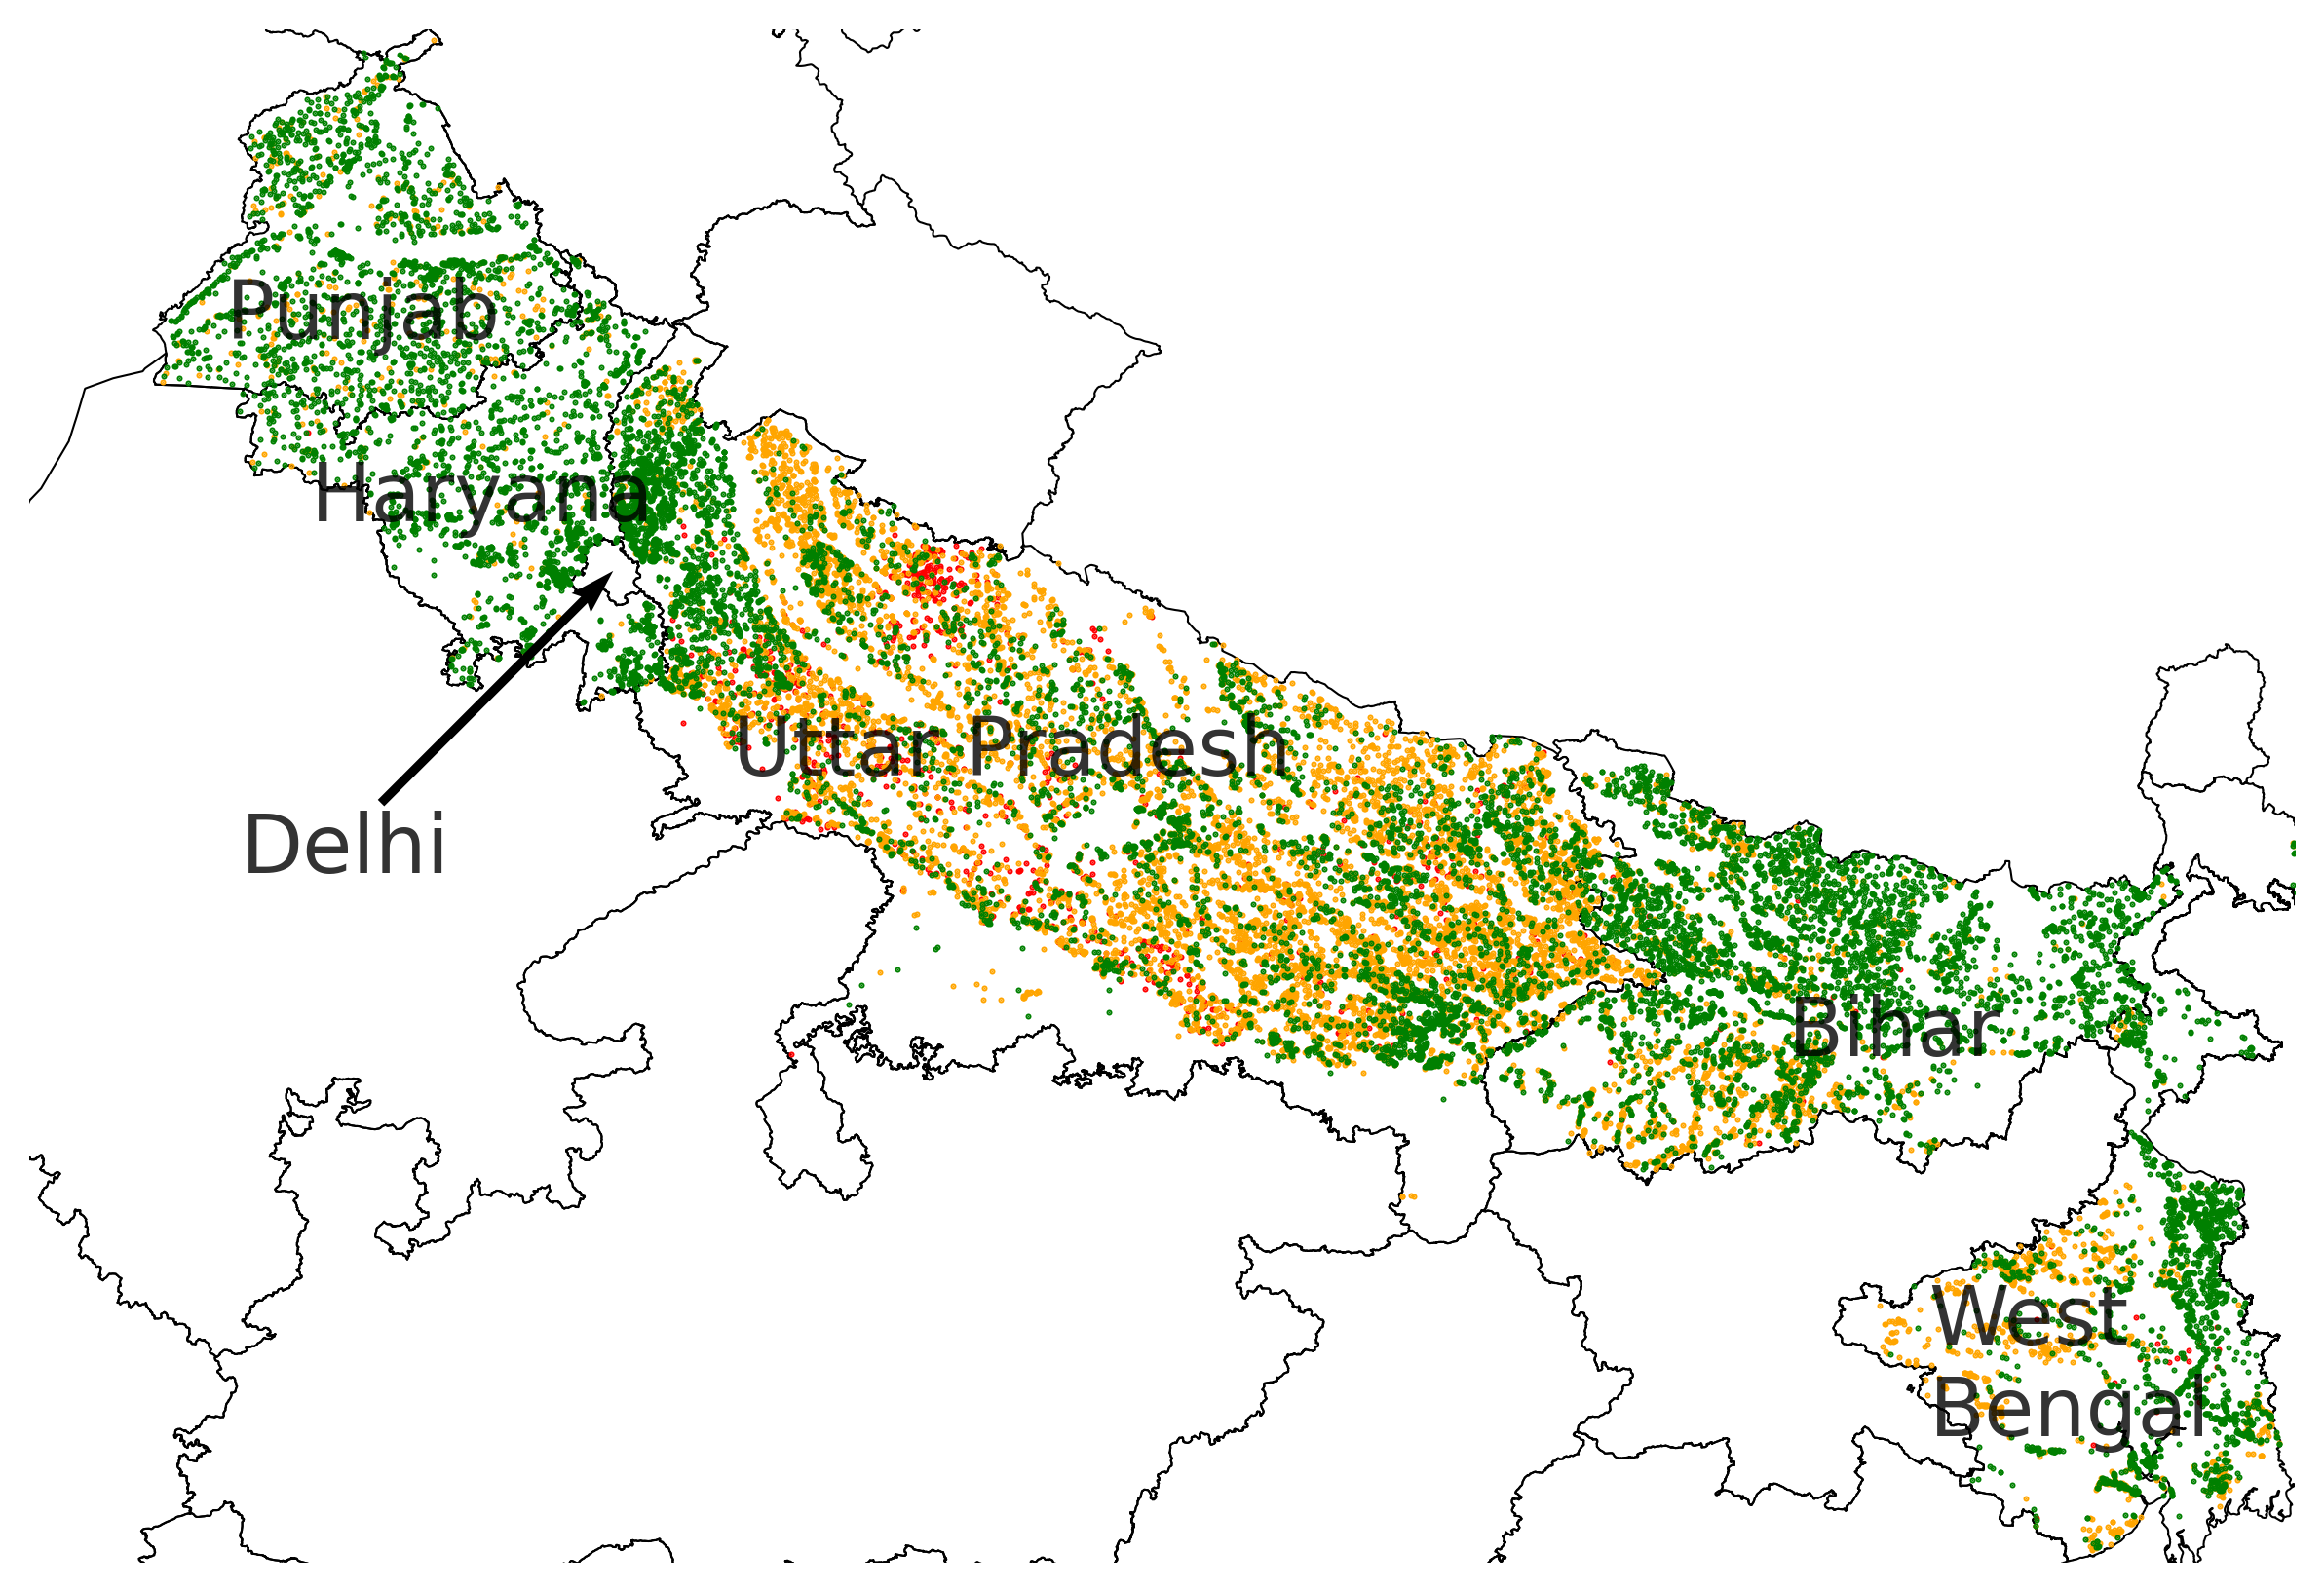

In [16]:
kiln_tech = "CFCBK"
kiln_tech = "FCBK"
kiln_tech = "Zigzag"

fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
india_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

# scatter plot of the kiln locations
CFCBK_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "CFCBK"]
FCBK_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "FCBK"]
Zigzag_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "Zigzag"]

if kiln_tech == "CFCBK" or kiln_tech == "FCBK" or kiln_tech == "Zigzag":
    ax.scatter(CFCBK_kilns.center_lon, CFCBK_kilns.center_lat, s=0.2, color='red')
# elif kiln_tech == "FCBK":
    ax.scatter(FCBK_kilns.center_lon, FCBK_kilns.center_lat, s=0.2, color='orange')
# elif kiln_tech == "Zigzag":
    ax.scatter(Zigzag_kilns.center_lon, Zigzag_kilns.center_lat, s=0.2, color='green')

ax.set_aspect("equal")
ax.set_axis_off()
ax.set_xlim(73, 89.1)
ax.set_ylim(21.6, 32.5)

ax.text(78, 27.2, "Uttar Pradesh", fontsize=20, alpha=0.8)
ax.text(85.5, 25.2, "Bihar", fontsize=20, alpha=0.8)
ax.text(86.5, 22.5, "West\nBengal", fontsize=20, alpha=0.8)
ax.text(75, 29, "Haryana", fontsize=20, alpha=0.8)
ax.text(74.4, 30.3, "Punjab", fontsize=20, alpha=0.8)

ax.text(74.5, 26.5, "Delhi", fontsize=20, alpha=0.8)

# draw a quiver between the two points
ax.quiver(75.5, 27, 1.65, 1.65, scale=1, scale_units='xy', angles='xy', color='black', width=0.004)

fig.savefig(f"../figures/kiln_locations_{kiln_tech}.png", bbox_inches="tight", dpi=300)

In [3]:
ncr_file="ncr_region.shp"
ncr_shape = gpd.read_file(ncr_file).to_crs("EPSG:4326")
display(ncr_shape.head(2))
len(ncr_shape)

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,ALWAR,RAJASTHAN,None,8,87,908983.518749,8.091212e+09,"POLYGON ((76.85108 28.22115, 76.85219 28.22098..."
1,BAGHPAT,UTTAR PRADESH,None,9,124,218392.986381,1.281800e+09,"POLYGON ((77.15903 29.29436, 77.15999 29.29427..."


30